In [1]:
import numpy as np
import pandas as pd
import os, re, random, gc
import pydicom as pdc
from utils.datahandling_utils import createImageArray


In [2]:
SEED = 41
BATCH_SIZE = 64
random.seed(SEED)

In [3]:
label_path = "D:/AIFs/AIFs/durable/BorrSci_MR_Data/Output"
image_path = "D:/iCAT_IMAGES"

In [4]:
data = pd.read_csv("data_indices.csv", ",", index_col = 0)
data = data.sort_values(["Patient", "Volume", "Slice"], ignore_index=True)

C:\Users\svenalrik\AppData\Local\Temp\ipykernel_16428\4254050036.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("data_indices.csv", ",", index_col = 0)


In [88]:
def crop_image(image: np.ndarray, reduction: float = 0.70):
    y_bottom, y_top = int(image.shape[0]*reduction), int(image.shape[0]*(1-reduction))
    return image[y_top:y_bottom, y_top:y_bottom]

In [141]:
patient = data.loc[(data['Patient']== 36) & (data['Slice']==18) & (data['Volume']==20)]
dcm = pdc.read_file(patient['ImagePath'].item()).pixel_array

reduction: float = 0.70
y_bottom, y_top = int(dcm.shape[0]*reduction), int(dcm.shape[0]*(1-reduction))
dcm_crop = dcm[y_top:y_bottom, y_top:y_bottom]
print(f"Image dimensions reduced from {dcm.shape} to {dcm_crop.shape}")

Image dimensions reduced from (160, 160) to (64, 64)


(-0.5, 159.5, 159.5, -0.5)

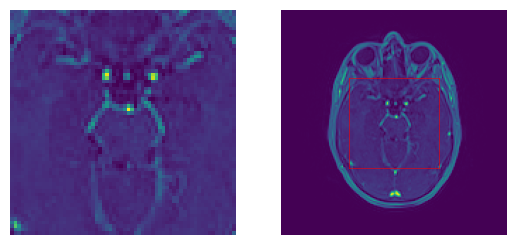

In [142]:
import matplotlib.pyplot as plt
import matplotlib.lines as line
fig, axs = plt.subplots(1,2)
axs[0].imshow(dcm_crop)
axs[0].axis('off')
axs[1].imshow(dcm)
axs[1].add_artist(line.Line2D([y_bottom, y_bottom], [y_top, y_bottom], color='red', linewidth=0.4)) # Høyre
axs[1].add_artist(line.Line2D([y_top, y_top], [y_top, y_bottom], color='red', linewidth=0.4))       # Venstre
axs[1].add_artist(line.Line2D([y_bottom, y_top], [y_top, y_top], color='red', linewidth=0.4))       # Topp
axs[1].add_artist(line.Line2D([y_bottom, y_top], [y_bottom, y_bottom], color='red', linewidth=0.4)) # Bunn
axs[1].axis('off')

In [6]:
# patient = data.loc[(data['Patient']==14)]
# details = []
# for pos in range(patient.shape[0]):
#     dcm = pdc.read_file(patient.iloc[pos]['ImagePath'])
#     details.append([dcm.AcquisitionNumber, dcm.SliceLocation])

In [7]:
# pd = pd.DataFrame(details, columns=["ImagePos", "InstanceNumber", "AcqNumber", "SeriesNumber", "SliceLocation"])

In [8]:
# acquisition number = volume, slice location = slice number
# np.unique(pd['SliceLocation'])


In [26]:
# import matplotlib.pyplot as plt
# max_slopes = np.zeros((array.shape[1], array.shape[2]))
# for row in range(array.shape[1]):
#     for col in range(array.shape[2]):
#         slopes = np.zeros(array.shape[0]-1)
#         for i in range(array.shape[0]-1):
#             slope = array[i+1, row, col] - array[i, row, col]
#             slopes[i] = slope
#         max_slopes[row, col] = np.max(slopes)

In [10]:
# _ = get_AIF_KMeans(slices, seed=SEED, visualize=True)

In [11]:
# class IndexTracker:
#     def __init__(self, ax, X):
#         self.ax = ax
#         ax.set_title('use scroll wheel to navigate images')

#         self.X = X
#         self.slices, rows, cols = X.shape
#         self.ind = self.slices//2

#         self.im = ax.imshow(self.X[self.ind, :, :])
#         self.update()

#     def on_scroll(self, event):
#         print("%s %s" % (event.button, event.step))
#         if event.button == 'up':
#             self.ind = (self.ind + 1) % self.slices
#         else:
#             self.ind = (self.ind - 1) % self.slices
#         self.update()

#     def update(self):
#         self.im.set_data(self.X[self.ind, :, :])
#         self.ax.set_ylabel('slice %s' % self.ind)
#         self.im.axes.figure.canvas.draw()



In [12]:
# %matplotlib qt
# fig, ax = plt.subplots(1, 1)

# tracker = IndexTracker(ax, slices)


# fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
# plt.show()